In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

student = pd.read_csv('stud_math.csv')

In [ ]:
# Описание датасета
# Посмотрим на переменные, которые содержит датасет:

# 1 school — аббревиатура школы, в которой учится ученик

# 2 sex — пол ученика ('F' - женский, 'M' - мужской)

# 3 age — возраст ученика (от 15 до 22)

# 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

# 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

# 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

# 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

# 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

# 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

# 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

# 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

# 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

# 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

# 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

# 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

# 16 schoolsup — дополнительная образовательная поддержка (yes или no)

# 17 famsup — семейная образовательная поддержка (yes или no)

# 18 paid — дополнительные платные занятия по математике (yes или no)

# 19 activities — дополнительные внеучебные занятия (yes или no)

# 20 nursery — посещал детский сад (yes или no)

# 21 higher — хочет получить высшее образование (yes или no)

# 22 internet — наличие интернета дома (yes или no)

# 23 romantic — в романтических отношениях (yes или no)

# 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

# 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

# 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

# 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

# 28 absences — количество пропущенных занятий

# 29 score — баллы по госэкзамену по математике

In [2]:
display(student.head(10))
student.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [6]:
pd.DataFrame(student.apply(pd.unique)).rename(columns={0:'Unique values'})

,Unique values
school,"[GP, MS]"
sex,"[F, M]"
age,"[18, 17, 15, 16, 19, 22, 20, 21]"
address,"[U, nan, R]"
famsize,"[nan, GT3, LE3]"
Pstatus,"[A, nan, T]"
Medu,"[4.0, 1.0, 3.0, 2.0, nan, 0.0]"
Fedu,"[4.0, 1.0, 2.0, 3.0, 40.0, nan, 0.0]"
Mjob,"[at_home, health, other, services, teacher, nan]"
Fjob,"[teacher, other, nan, health, services, at_home]"


In [7]:
#уберем опечатки
#значение 40 скорее всего опечатка, заменим на 4 ('Higher'); -1 заменим на 1

student = student.replace({'Fedu' : { 40 : 4}})
student = student.replace({'famrel' : { -1 : 1}})

In [8]:
#назначим категориальные переменные
col = ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health', 'failures']
student[col] = student[col].astype('category')
#заменим чиловые значения на категории
student = student.replace({'Medu' : { 0 : 'NoNe', 1 : 'Easy',  2 : 'Mean',  3 : 'Special', 4 : 'Higher'}})
student = student.replace({'Fedu' : { 0 : 'NoNe', 1 : 'Easy',  2 : 'Mean',  3 : 'Special', 4 : 'Higher'}})
student = student.replace({'traveltime' : { 1 : '<15 мин.',  2 : '15-30 мин.',  3 : '30-60 мин.', 4 : '>60 мин.'}})
student = student.replace({'studytime' : { 1 : '<2_часов',  2 : '2-5_часов',  3 : '5-10_часов', 4 : '>10_часов'}})
student = student.replace({'famrel' : { 1 : 'очень_плохое',  2 : 'плохое',  3 : 'среднее', 4 : 'хорошее', 5 : 'очень_хорошее'}})
student = student.replace({'freetime' : { 1 : 'очень_мало',  2 : 'мало',  3 : 'средне', 4 : 'много', 5 : 'очень_много'}})
student = student.replace({'goout' : { 1 : 'очень_мало',  2 : 'мало',  3 : 'средне', 4 : 'много', 5 : 'очень_много'}})
student = student.replace({'health' : { 1 : 'очень_плохое',  2 : 'плохое',  3 : 'среднее', 4 : 'хорошее', 5 : 'очень_хорошее'}})
student = student.replace({'failures' : { 1 : '1',  2 : '2',  3 : '3', 4 : '4', 0 : '0'}})

pd.DataFrame(student.apply(pd.unique)).rename(columns={0:'Unique values'})

,Unique values
school,"[GP, MS]"
sex,"[F, M]"
age,"[18, 17, 15, 16, 19, 22, 20, 21]"
address,"[U, nan, R]"
famsize,"[nan, GT3, LE3]"
Pstatus,"[A, nan, T]"
Medu,"[Higher, Easy, Special, Mean, nan, NoNe]"
Fedu,"[Higher, Easy, Mean, Special, nan, NoNe]"
Mjob,"[at_home, health, other, services, teacher, nan]"
Fjob,"[teacher, other, nan, health, services, at_home]"


In [6]:
student.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [9]:
# Функция для вычисления пропущенных значений по столбцам и их % соотношений
def missing_values(df):
    # Общее количество пропущенных значений
    mis_val = df.isnull().sum()
        
    # Процент пропущенных значений
    mis_val_percent = 100 * df.isnull().sum() / len(df)
        
    # Составьте таблицу с результатами
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Переименуйте столбцы
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
    # Сортировка таблицы по проценту отсутствующих по убыванию
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
        
    # Вывод краткой информации
    print ("Выбранный вами дата фрейм имеет " + str(df.shape[1]) + " Столбцов.\n"      
        "Здесь есть " + str(mis_val_table_ren_columns.shape[0]) +
            " столбцы с пропущенными значениями.")

    
    # Возвращаем дата фрейм с отсутствующей информацией
    return mis_val_table_ren_columns


In [6]:
missing_values(student)

Выбранный вами дата фрейм имеет 30 Столбцов.
Здесь есть 27 столбцы с пропущенными значениями.


,Missing Values,% of Total Values
Pstatus,45,11.4
paid,40,10.1
famsup,39,9.9
Fjob,36,9.1
internet,34,8.6
romantic,31,7.8
guardian,31,7.8
traveltime,28,7.1
famrel,27,6.8
famsize,27,6.8


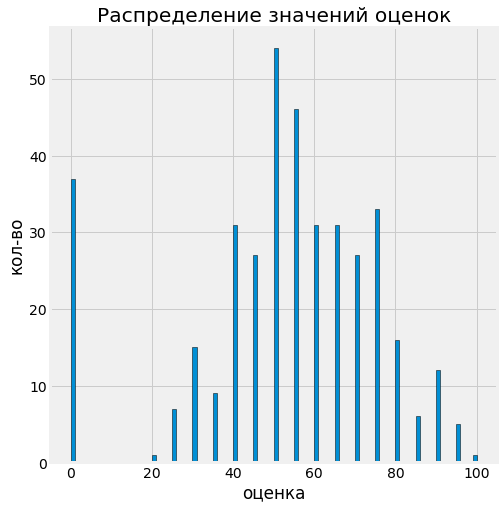

In [10]:
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
# Перед очиской данных посмотрим на распределение главной переменной 
# Гистограмма распределения оценки 

plt.figure(figsize(8, 8))

plt.style.use('fivethirtyeight')
plt.hist(student['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('оценка'); plt.ylabel('кол-во'); 
plt.title('Распределение значений оценок');

In [11]:
#заменим пропуски в score на о
student.score = student.score.fillna(0)
student.score.isnull().sum()

0

In [12]:
#удалим нулевые записи оценки
student[['score']] = student[['score']].astype(int)
student = student[student.score != 0]
student.score.unique()

array([ 30,  50,  75,  55,  95,  45,  60,  70,  80,  25,  40,  85,  90,
        65, 100,  35,  20])

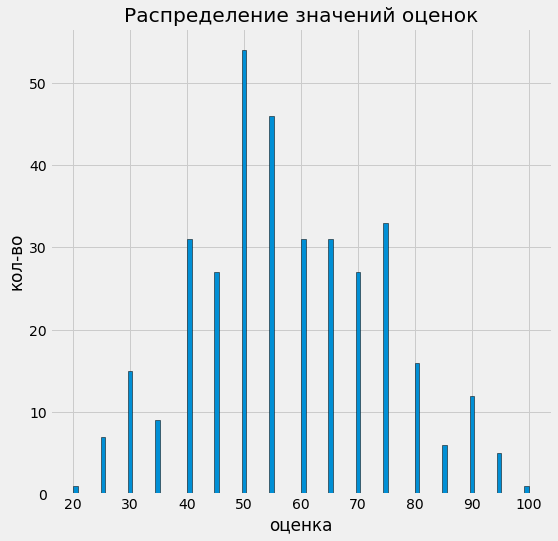

In [13]:
# Гистограмма распределения оценки 

plt.figure(figsize(8, 8))

plt.style.use('fivethirtyeight')
plt.hist(student['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('оценка'); plt.ylabel('кол-во'); 
plt.title('Распределение значений оценок');

In [14]:
#заполним все пустые значения числовых переменных медианым значением
df_numeric = student.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = student[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  #выполнить только в столбцах где есть пропущеные значения
        print('imputing missing values for: {}'.format(col))
        student['{}_ismissing'.format(col)] = missing
        med = student[col].median()
        student[col] = student[col].fillna(med)

imputing missing values for: studytime, granular
imputing missing values for: absences


In [12]:
student.select_dtypes(include=[np.number]).isnull().sum()

age                    0
studytime, granular    0
absences               0
score                  0
dtype: int64

In [15]:
#заполним все пустые значения НЕчисловых переменных значением '_MISSING_'
df_object = student.select_dtypes(exclude=[np.number])
object_cols = df_object.columns.values

for col in object_cols:
    missing = student[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  #выполнить только в столбцах где есть пропущеные значения
        print('imputing missing values for: {}'.format(col))
        student['{}_ismissing'.format(col)] = missing
        student[col] = student[col].fillna('_MISSING_')

imputing missing values for: address
imputing missing values for: famsize
imputing missing values for: Pstatus
imputing missing values for: Medu
imputing missing values for: Fedu
imputing missing values for: Mjob
imputing missing values for: Fjob
imputing missing values for: reason
imputing missing values for: guardian
imputing missing values for: traveltime
imputing missing values for: studytime
imputing missing values for: failures
imputing missing values for: schoolsup
imputing missing values for: famsup
imputing missing values for: paid
imputing missing values for: activities
imputing missing values for: nursery
imputing missing values for: higher
imputing missing values for: internet
imputing missing values for: romantic
imputing missing values for: famrel
imputing missing values for: freetime
imputing missing values for: goout
imputing missing values for: health


In [16]:
missing_values(student)

Выбранный вами дата фрейм имеет 56 Столбцов.
Здесь есть 0 столбцы с пропущенными значениями.


,Missing Values,% of Total Values


In [17]:
# Найдем чиловые столбцы с выбросами; сохраним названия столбцов в списках
max_val=[]
min_val=[]
for column in student.select_dtypes(include=[np.number]):
    IQR = student[column].quantile(0.75) - student[column].quantile(0.25)
    perc25 = student[column].quantile(0.25)
    perc75 = student[column].quantile(0.75)
    std_v = student[column].std()
    col_min = student[column].min()
    col_max = student[column].max()
    if col_max > (perc75 +(1.5*IQR)):
        max_val.append(column)
        print (column,'Макс кол-во',col_max, 'Колво стан откл',col_max - (perc75 +(1.5*IQR))/std_v)
    if col_min < perc25 - (1.5*IQR):
        min_val.append(column)
        print (column,'Мин кол-во',col_min, 'Колво стан откл',(1.5*IQR) - col_min)    

age Макс кол-во 22 Колво стан откл 5.28039512157633
studytime, granular Мин кол-во -12.0 Колво стан откл 16.5
absences Макс кол-во 385.0 Колво стан откл 384.30212459571715


<AxesSubplot:>

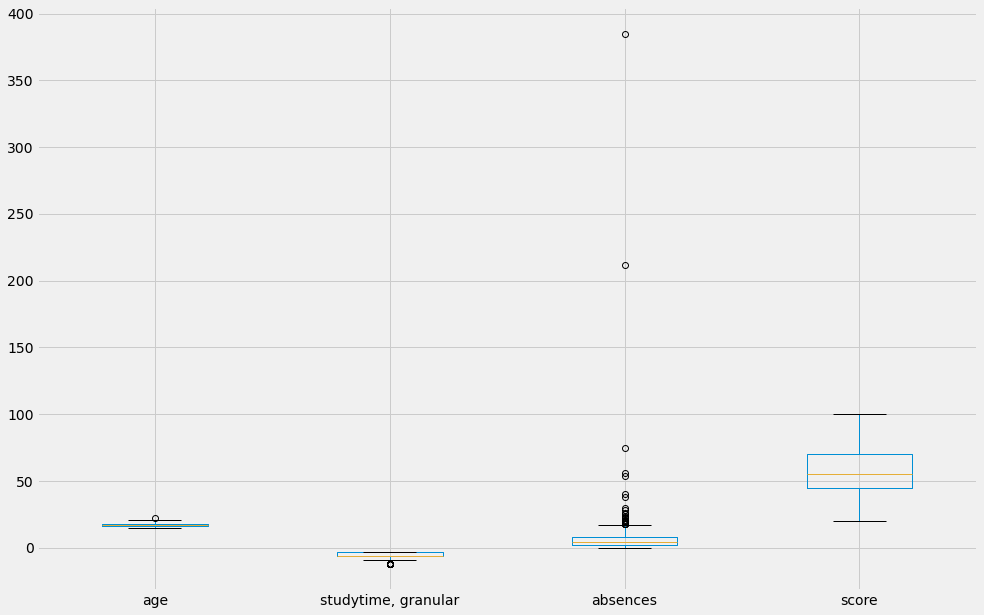

In [15]:
#Посмотрим выбросы на графике
plt.figure(figsize=(15,10))
student.select_dtypes(include=[np.number]).boxplot()

In [19]:
# Ограничим колво занятий макс значение 170 (колво учебных дней в году)
student = student.loc[student.absences <= 170]
student.absences.describe()

count    350.000000
mean       6.314286
std        8.213035
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

<AxesSubplot:>

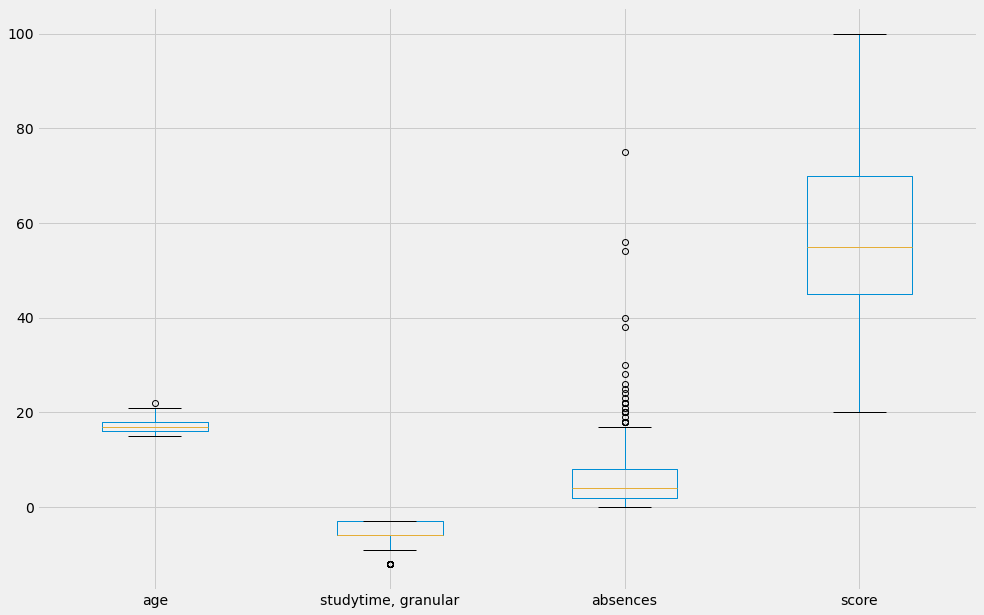

In [20]:
plt.figure(figsize=(15,10))
student.select_dtypes(include=[np.number]).boxplot()

In [17]:
student['studytime, granular'].value_counts()

-6.0     178
-3.0      90
-9.0      58
-12.0     24
Name: studytime, granular, dtype: int64

In [21]:
# График распределения баллов по категориям данных
def get_kdeplot(column):
    
    fig,  ax = plt.subplots(figsize = (14, 8))

    list_time = student[column]
    list_time = list(list_time.unique())
    list_time.remove('_MISSING_')

    # График студента
    for b_type in list_time:
        # Выбераем категориям времени на учебу
        subset = student[student[column] == b_type]

        # График плотности Score
        sns.kdeplot(subset['score'].dropna(), 
                    label = b_type, shade = False, legend = True, alpha = 0.8,  ax = ax);

    # Метки осей
    plt.legend()
    plt.xticks(rotation=45)
    plt.xlabel('Score', size = 10); 
    plt.ylabel('Данные ' + column, size = 10);
    plt.title('График распределения баллов по категориям времени на учебу ' + column, size = 15);

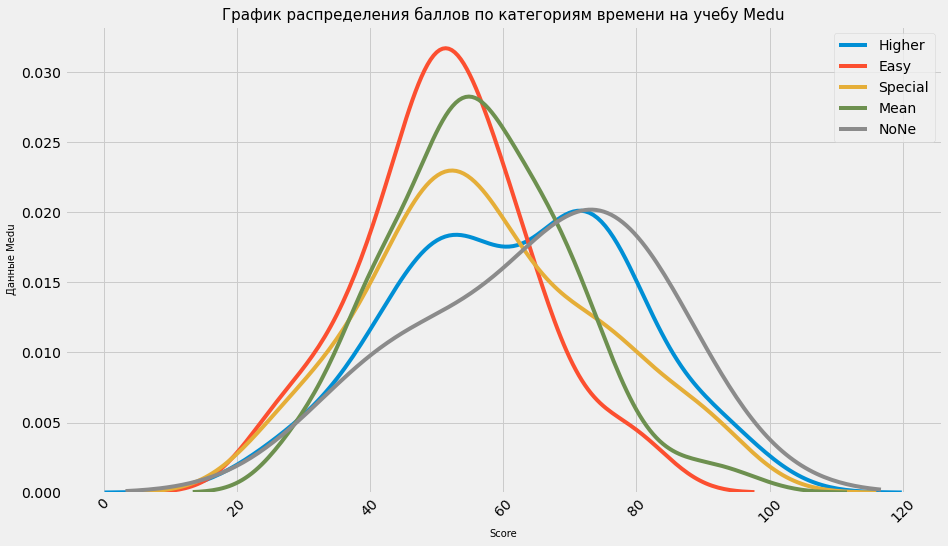

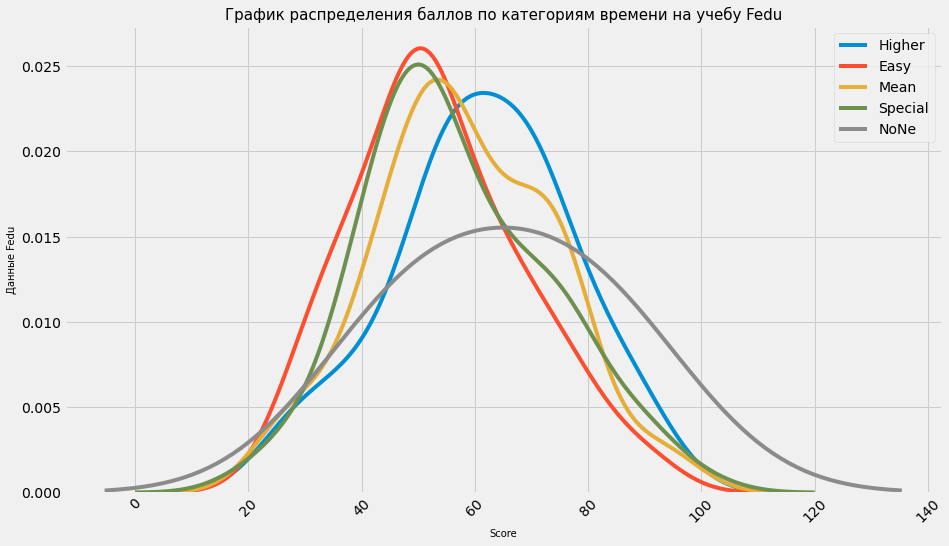

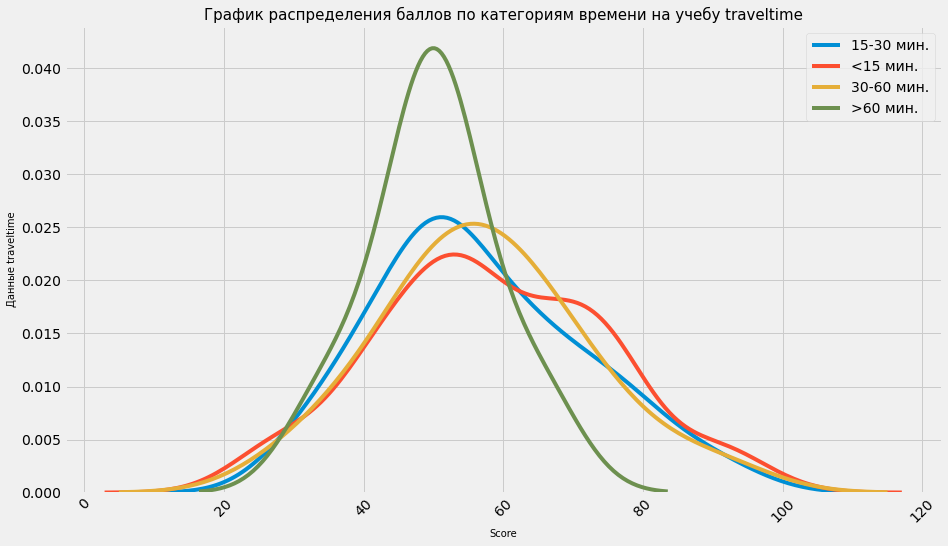

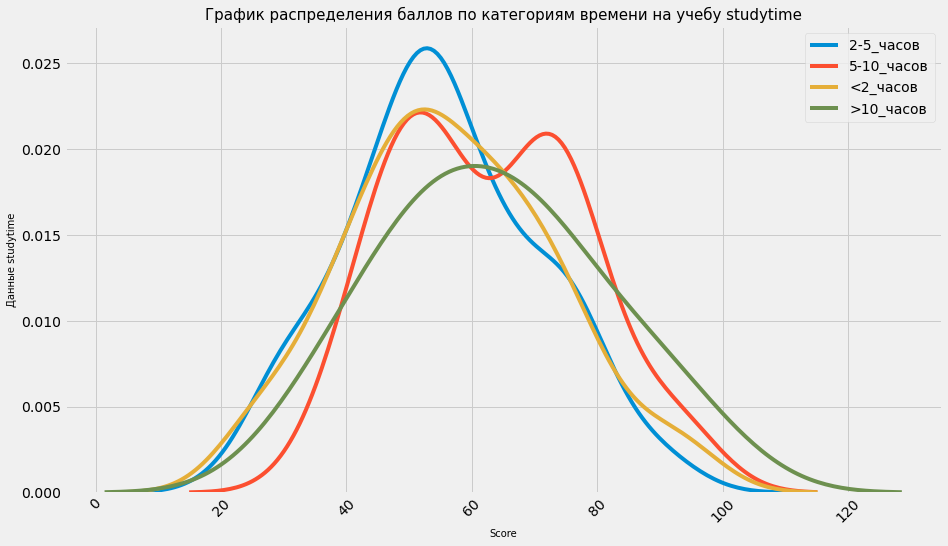

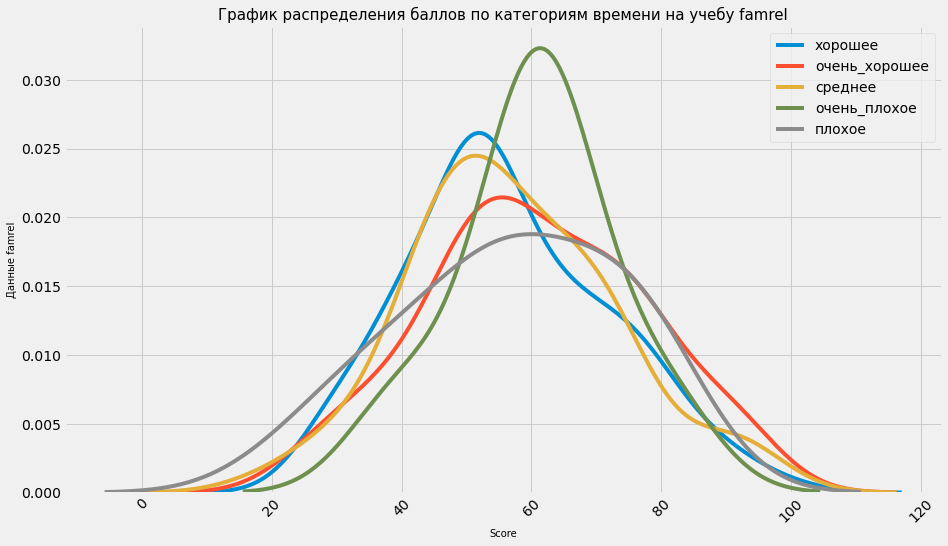

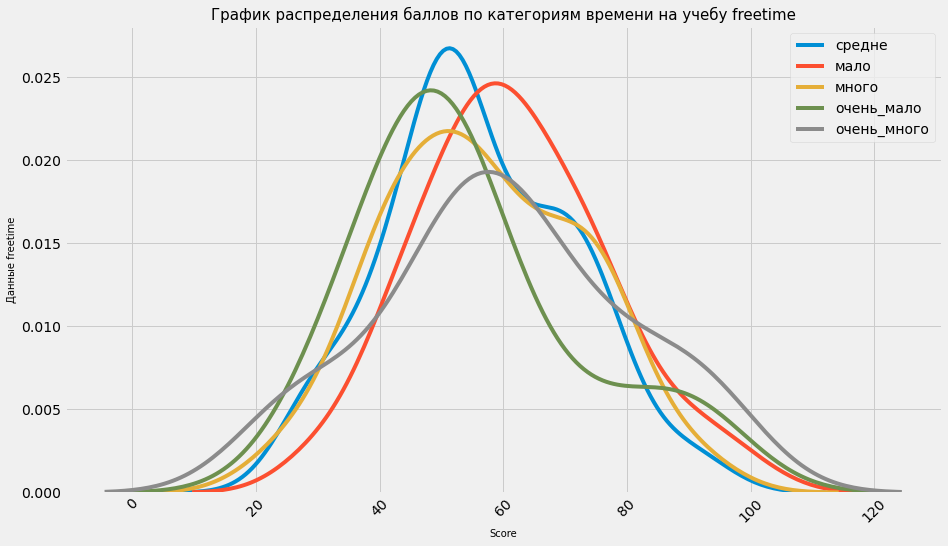

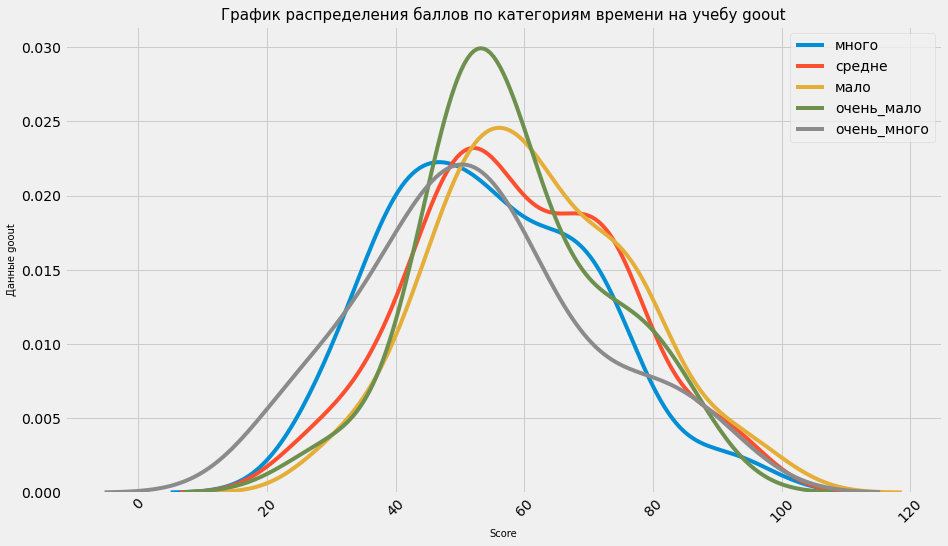

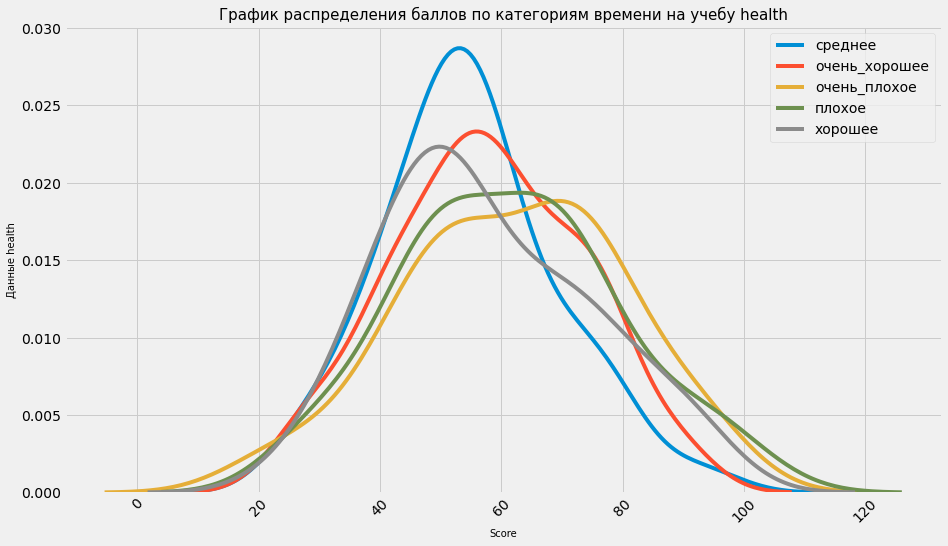

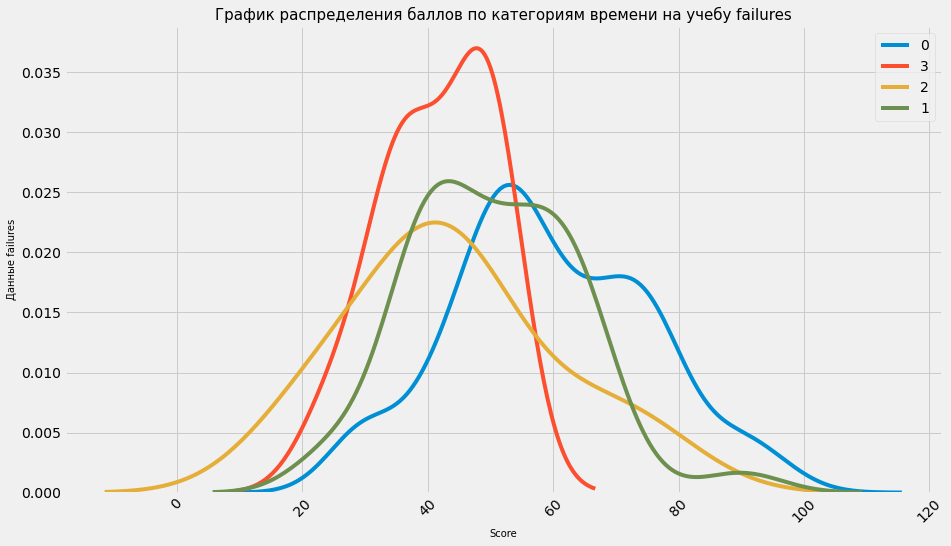

In [22]:
for col in ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health', 'failures']:
    get_kdeplot(col)

In [ ]:
#Посмотри на другом графике 
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=student.loc[student.loc[:, column].isin(student.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

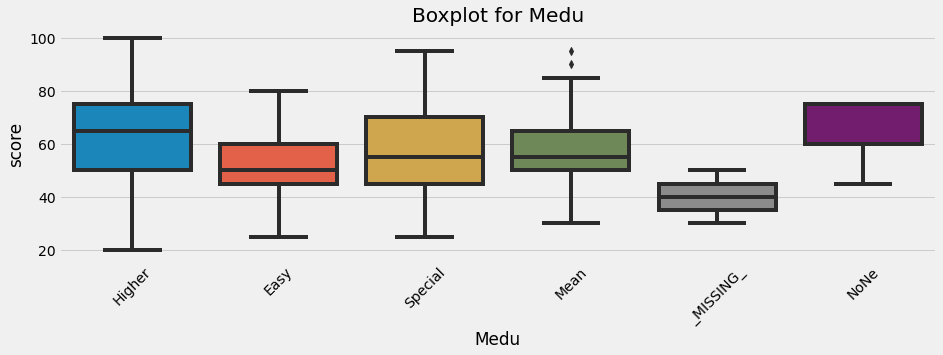

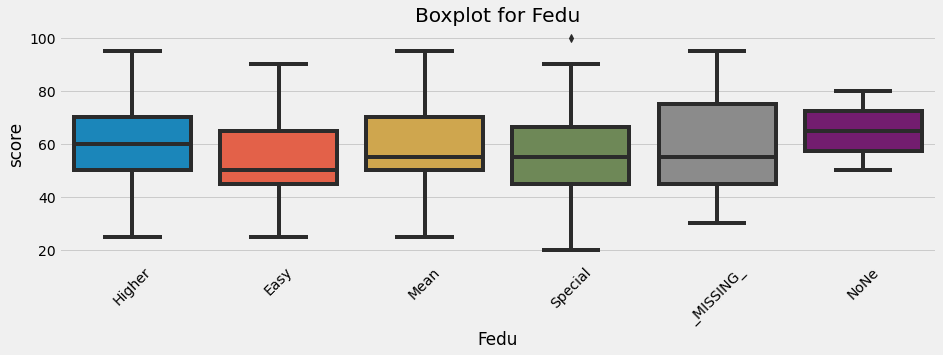

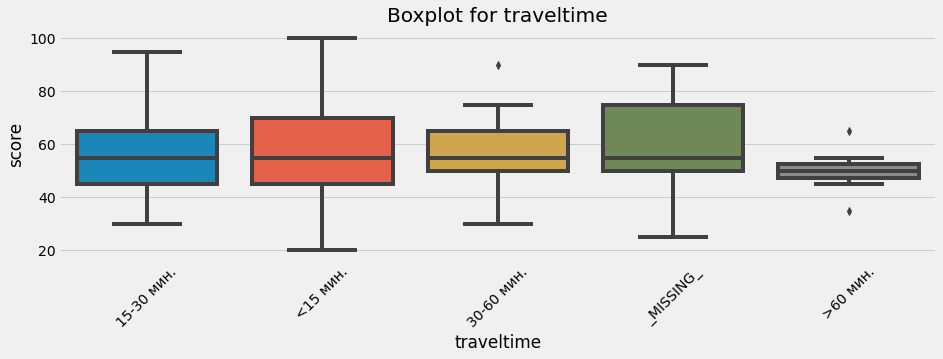

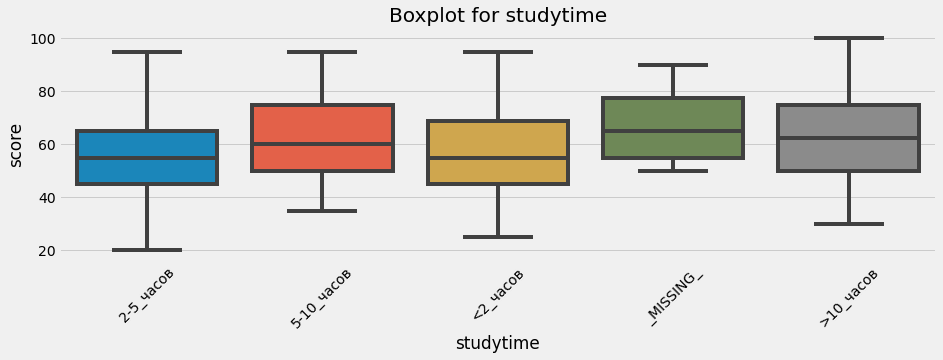

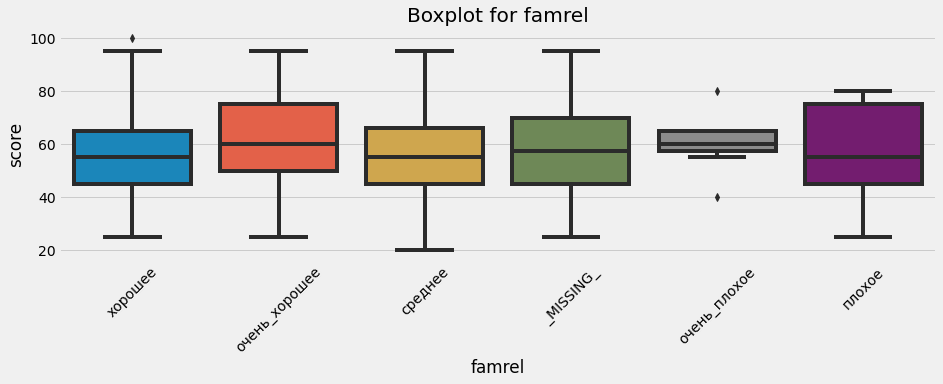

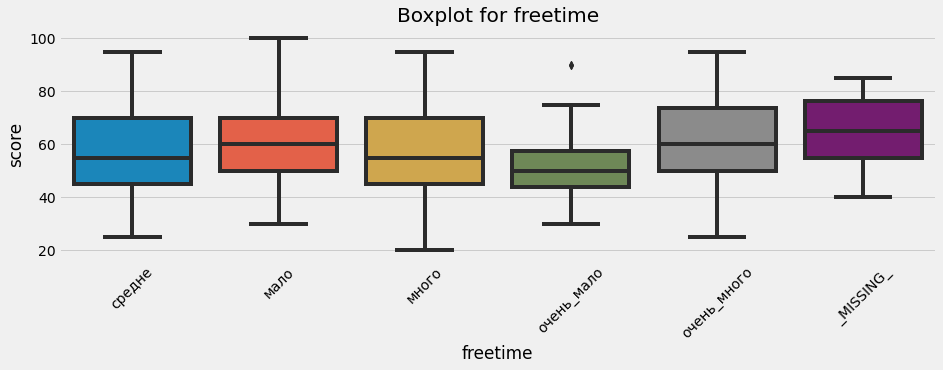

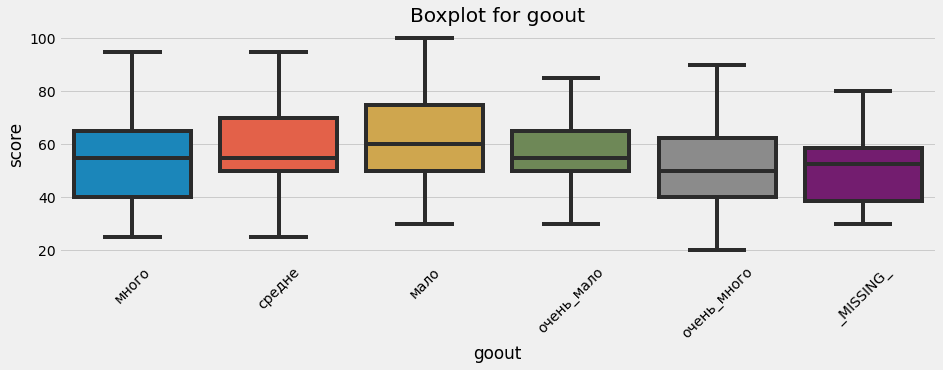

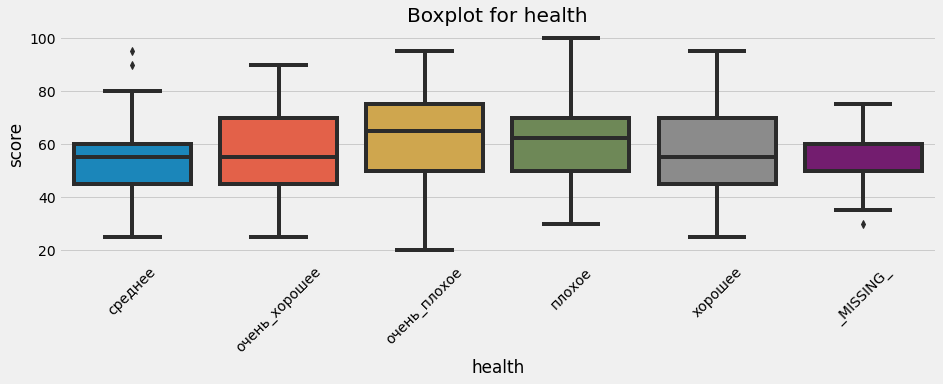

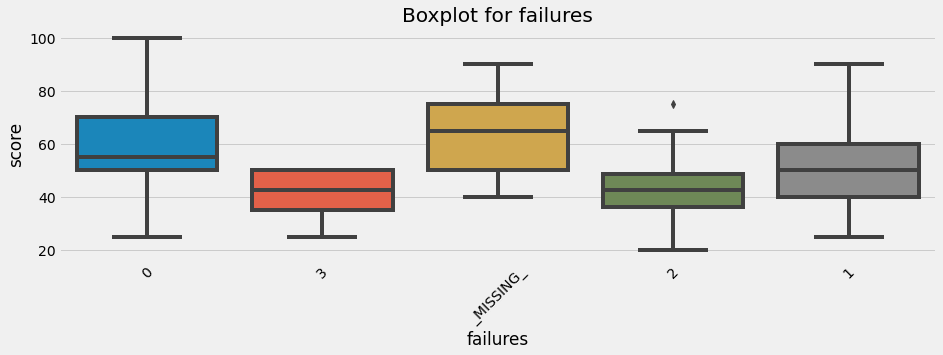

In [135]:
for col in ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health', 'failures']:
    get_boxplot(col)

In [38]:
#Проведем тест Стьюдента для отбора статистически значимых коллонок
def get_stat_dif(column):
    cols = student.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(student.loc[student.loc[:, column] == comb[0], 'score'], 
                        student.loc[student.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [39]:
for col in ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health', 'failures']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures


In [43]:
# Поиск всеx корреляции и сортировка
correlations_data = student.corr()['score'].sort_values()

# Вывод самых отрицательных корреляций
print(correlations_data.head(15), '\n')

# Вывод самых положительных корреляций
print(correlations_data.tail(15))

absences               -0.214358
studytime, granular    -0.140438
age                    -0.125073
schoolsup_ismissing    -0.088810
Medu_ismissing         -0.083183
health_ismissing       -0.070455
goout_ismissing        -0.049473
paid_ismissing         -0.048189
guardian_ismissing     -0.043055
famsize_ismissing      -0.028111
activities_ismissing   -0.026816
romantic_ismissing     -0.021645
reason_ismissing       -0.004993
famrel_ismissing       -0.000100
traveltime_ismissing    0.005408
Name: score, dtype: float64 

higher_ismissing                 0.006583
internet_ismissing               0.013665
famsup_ismissing                 0.014748
Fedu_ismissing                   0.028318
Pstatus_ismissing                0.029560
address_ismissing                0.033416
nursery_ismissing                0.055855
Mjob_ismissing                   0.056688
freetime_ismissing               0.069022
Fjob_ismissing                   0.069474
failures_ismissing               0.076790
studytime_ism

In [40]:
#Посмотрим на коррелирующие переменные
student.select_dtypes(include=[np.number]).corr()

,age,"studytime, granular",absences,score
age,1.000000,0.011048,0.208898,-0.125073
"studytime, granular",0.011048,1.000000,0.076900,-0.140438
absences,0.208898,0.076900,1.000000,-0.214358
score,-0.125073,-0.140438,-0.214358,1.000000


In [42]:
#Создадим набор данных для модели
student_for_model = student.loc[:, ['Medu', 'Fedu', 'studytime', 'failures', 'age', 'studytime, granular', 'absences', 'score']]
student_for_model.head()

,Medu,Fedu,studytime,failures,age,"studytime, granular",absences,score
0,Higher,Higher,2-5_часов,0,18,-6.0,6.0,30
1,Easy,Easy,2-5_часов,0,17,-6.0,4.0,30
2,Easy,Easy,2-5_часов,3,15,-6.0,10.0,50
3,Higher,Mean,5-10_часов,0,15,-9.0,2.0,75
4,Special,Special,2-5_часов,0,16,-6.0,4.0,50
...,...,...,...,...,...,...,...,...
388,Special,Easy,2-5_часов,0,18,-6.0,0.0,40
391,Special,Easy,<2_часов,0,17,-3.0,3.0,80
392,Easy,Easy,<2_часов,3,21,-3.0,3.0,35
393,Special,Mean,<2_часов,0,18,-3.0,0.0,50
